<a href="https://colab.research.google.com/github/ScumpikLau/ml-product-category-laura-corbu/blob/main/notebook/model_comparison_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and inspecting the cleaned dataset

In [1]:
import pandas as pd

# Load dataset from github
url = "https://raw.githubusercontent.com/ScumpikLau/ml-product-category-laura-corbu/main/notebook/data/data_clean.csv"

df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First five rows:")
display(df.head())
# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Number of rows: 34760
First five rows:


,Unnamed: 0,Product Title,Category Label,category,title_char_count,title_word_count,title_has_numbers,title_special_char,brand_found,title_has_brand,title_longest_word_len
0,0,apple iphone 8 plus 64gb silver,Mobile Phones,Mobile Phones,31,6,True,False,apple,True,6
1,1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones,Mobile Phones,35,7,True,False,apple,True,9
2,2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones,Mobile Phones,70,13,True,True,apple,True,10
3,3,apple iphone 8 plus 64gb space grey,Mobile Phones,Mobile Phones,35,7,True,False,apple,True,6
4,4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones,Mobile Phones,54,11,True,True,apple,True,8



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34760 entries, 0 to 34759
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              34760 non-null  int64 
 1   Product Title           34760 non-null  object
 2   Category Label          34760 non-null  object
 3   category                34760 non-null  object
 4   title_char_count        34760 non-null  int64 
 5   title_word_count        34760 non-null  int64 
 6   title_has_numbers       34760 non-null  bool  
 7   title_special_char      34760 non-null  bool  
 8   brand_found             10725 non-null  object
 9   title_has_brand         34760 non-null  bool  
 10  title_longest_word_len  34760 non-null  int64 
dtypes: bool(3), int64(4), object(4)
memory usage: 2.2+ MB


## Import requiered libraries and split the data into train and test sets

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Features and label
x = df[['Product Title', 'title_char_count', 'title_longest_word_len']]
y = df['category']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

- Transforming the 'Product Title' column using **TF-IDF**
- Scaling 'title_char_count' and 'title_longest_word_len' using**MinMaxScaler**
- Using a **ColumnTransformer** to combine all features into a single input matrix and making a list of classifiers

In [3]:
# Preprocessor TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "Product Title"),
        ("char_count", MinMaxScaler(), ["title_char_count"]),
        ("longest_word_len", MinMaxScaler(), ["title_longest_word_len"])
    ]
)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

## Wrapping all components into a unified **Pipeline** for each model to train all models and keep the predictions

In [4]:
trained_pipelines = {}
preds = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    trained_pipelines[name] = pipe
    preds[name] = y_pred

print("Models are trained")

Models are trained


## Calculating Accuracy of predictions

In [5]:
acc_rows = []
for name, y_pred in preds.items():
    acc_rows.append({"model": name, "accuracy": accuracy_score(y_test, y_pred)})

# Display results in a DataFrame
acc_df = pd.DataFrame(acc_rows).sort_values("accuracy", ascending=False)
acc_df.reset_index(drop=True, inplace=True)
print(f"Models accuracy:\n{acc_df}")


Models accuracy:
                    model  accuracy
0  Support Vector Machine  0.969217
1           Random Forest  0.963320
2     Logistic Regression  0.957854
3           Decision Tree  0.947066
4             Naive Bayes  0.932825


## Calculating the Classification report

In [6]:

for name, y_pred in preds.items():
    print(f"\n=== {name} — Classification report ===")
    print(classification_report(y_test, y_pred, digits=3))



=== Logistic Regression — Classification report ===
                  precision    recall  f1-score   support

            CPUs      1.000     0.993     0.997       758
 Digital Cameras      1.000     0.989     0.994       532
     Dishwashers      0.903     0.966     0.933       675
        Freezers      0.990     0.901     0.944       436
 Fridge Freezers      0.953     0.930     0.941      1085
         Fridges      0.898     0.908     0.903       705
      Microwaves      0.995     0.948     0.971       461
   Mobile Phones      0.973     0.991     0.982       805
             TVs      0.969     0.994     0.982       701
Washing Machines      0.938     0.950     0.944       794

        accuracy                          0.958      6952
       macro avg      0.962     0.957     0.959      6952
    weighted avg      0.959     0.958     0.958      6952


=== Naive Bayes — Classification report ===
                  precision    recall  f1-score   support

            CPUs      0.999 

## CONCLUSION
## We can see that **Support Vector Machine** has the highest scores, as Precision, Recall and f1-score

## Display and visualize Confusion Matrix

Confusion Matrix for Logistic Regression:
 [[ 753    0    0    0    0    2    0    3    0    0]
 [   0  526    1    0    0    0    0    3    2    0]
 [   0    0  652    0    2    9    0    3    0    9]
 [   0    0    4  393    8   17    1    2    1   10]
 [   0    0   24    2 1009   31    0    0    5   14]
 [   0    0   14    2   38  640    0    2    0    9]
 [   0    0    6    0    0    6  437    3    1    8]
 [   0    0    1    0    0    0    0  798    6    0]
 [   0    0    0    0    0    0    0    4  697    0]
 [   0    0   20    0    2    8    1    2    7  754]]


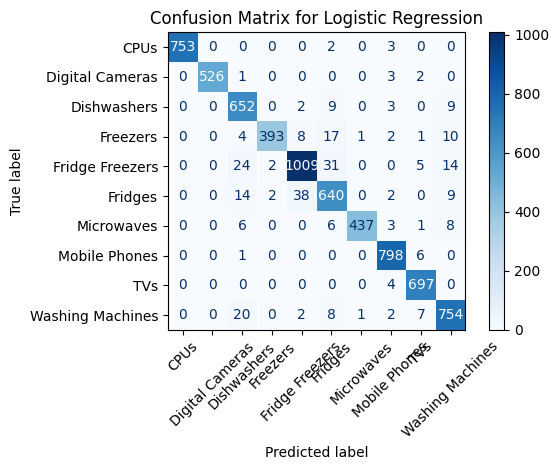

Confusion Matrix for Naive Bayes:
 [[ 755    0    0    0    2    0    0    0    1    0]
 [   0  530    0    0    0    0    0    1    1    0]
 [   0    0  649    0   20    2    0    1    0    3]
 [   0    0    0  212  188   32    1    0    0    3]
 [   0    0    2    0 1071   12    0    0    0    0]
 [   0    1    3    0  120  577    0    0    0    4]
 [   0    0    1    0   14    1  442    0    1    2]
 [   1    0    0    0    3    0    0  795    5    1]
 [   0    0    9    0    0    0    0    2  690    0]
 [   0    0    2    0   20    4    1    0    3  764]]


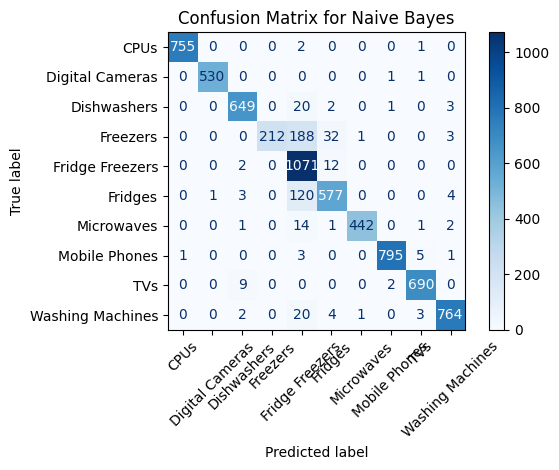

Confusion Matrix for Decision Tree:
 [[753   0   0   0   2   0   0   3   0   0]
 [  0 513   1   0   1   3   0  13   1   0]
 [  0   1 644   0   5   4   4   1   0  16]
 [  0   0   5 396  14  13   3   3   0   2]
 [  0   0  14  11 991  42   7   3   6  11]
 [  0   0  12  12  39 631   1   3   0   7]
 [  0   1   7   1   4   4 433   4   0   7]
 [  0   4   0   1   0   1   4 787   6   2]
 [  0   1   0   0   0   0   2  10 687   1]
 [  0   1  13   2  13   8   5   1   2 749]]


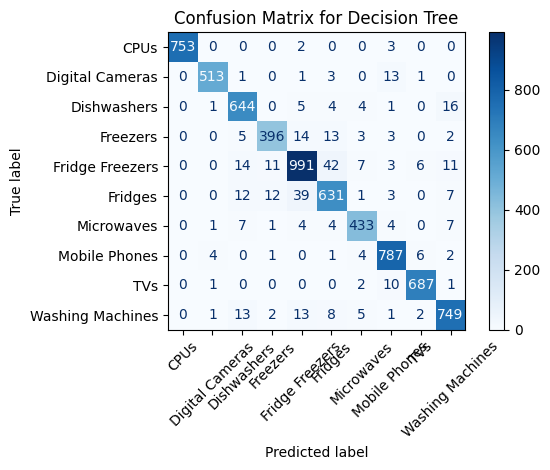

Confusion Matrix for Random Forest:
 [[ 755    0    0    0    2    0    0    1    0    0]
 [   0  522    0    0    0    1    0    6    2    1]
 [   0    0  660    1    4    3    0    2    0    5]
 [   0    0    6  405   11   10    1    1    0    2]
 [   0    0   10    9 1021   32    3    0    2    8]
 [   0    0    7    8   46  635    0    2    0    7]
 [   0    0    2    0    4    4  442    0    0    9]
 [   0    0    0    0    1    0    0  802    2    0]
 [   0    0    0    0    0    0    0    6  693    2]
 [   0    0   15    0    7    4    4    0    2  762]]


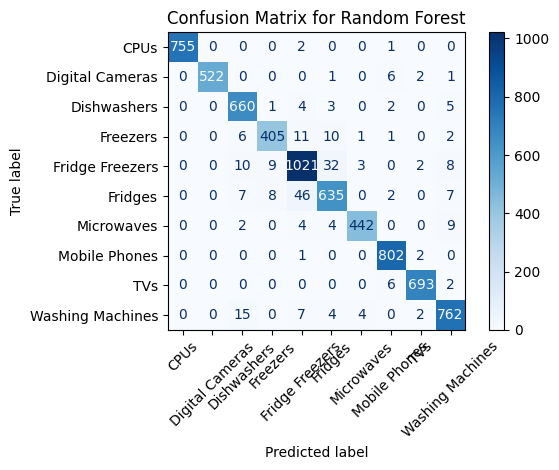

Confusion Matrix for Support Vector Machine:
 [[ 756    0    0    0    0    0    0    0    2    0]
 [   0  529    0    0    0    0    0    2    1    0]
 [   0    0  660    1    1    5    0    0    0    8]
 [   0    0    5  409    3   10    0    0    0    9]
 [   0    0   21    7 1032   10    0    0    5   10]
 [   0    1   10    3   29  650    0    1    1   10]
 [   0    0    7    0    0    3  442    0    1    8]
 [   0    0    0    0    0    0    0  800    5    0]
 [   0    0    0    0    0    0    0    2  699    0]
 [   0    0   18    0    2    6    1    0    6  761]]


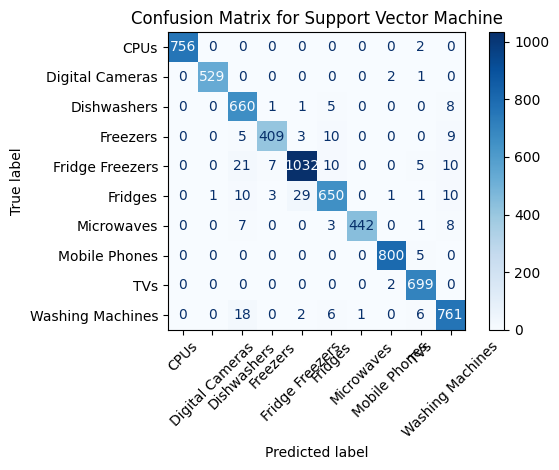

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = sorted(y.unique())

for name, y_pred in preds.items():
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(f"Confusion Matrix for {name}:\n {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(colorbar= True, cmap=plt.cm.Blues)
    disp.ax_.tick_params(axis='x', labelrotation=45)  # ← rotește X
    disp.ax_.set_title(f"Confusion Matrix for {name}")
    plt.tight_layout()
    plt.show()
